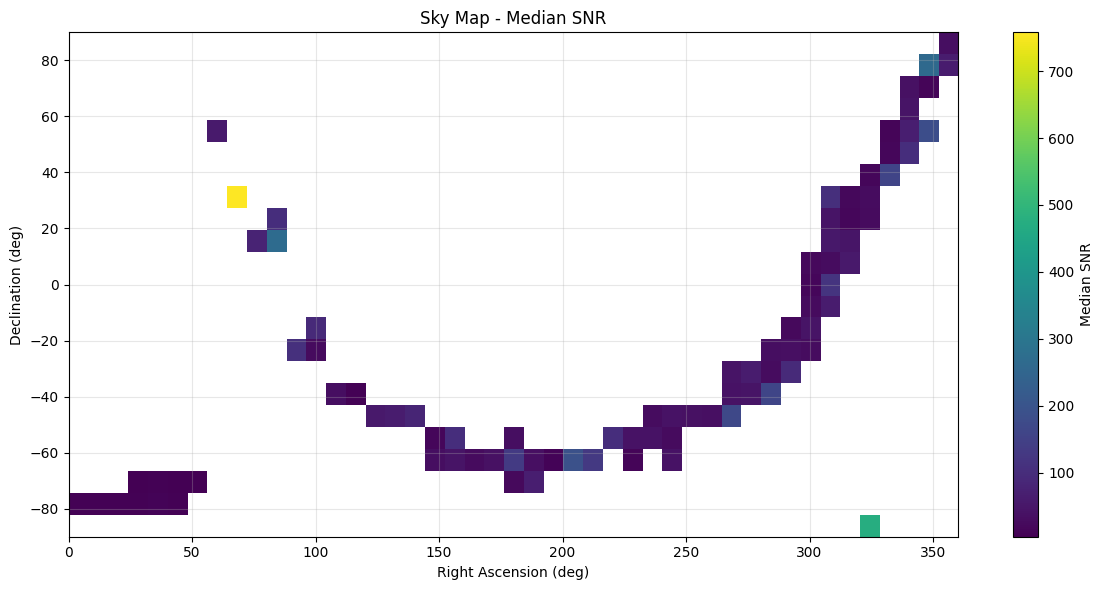

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import median_absolute_deviation
from matplotlib.colors import LogNorm
import pandas as pd

# Example: Load your data
# Assuming data is in a file like 'skydata.csv' with columns 'ra', 'dec', 'snr'
# df = pd.read_csv('skydata.csv')

ra, dec, snr = np.loadtxt("snr_table.txt").T

# Create DataFrame
df = pd.DataFrame({'ra': ra, 'dec': dec, 'snr': snr})

# Define bin sizes in degrees
ra_bin_size = 5  # degrees
dec_bin_size = 5  # degrees

# Create bins
ra_bins = np.arange(0, 360 + ra_bin_size, ra_bin_size)
dec_bins = np.arange(-90, 90 + dec_bin_size, dec_bin_size)

# Group by bins and calculate median SNR
df['ra_bin'] = pd.cut(df['ra'], bins=ra_bins, labels=ra_bins[:-1] + ra_bin_size/2)
df['dec_bin'] = pd.cut(df['dec'], bins=dec_bins, labels=dec_bins[:-1] + dec_bin_size/2)

# Group by the binned coordinates and calculate median SNR
binned_data = df.groupby(['ra_bin', 'dec_bin'])['snr'].median().reset_index()

# Convert to a format suitable for plotting (pivot table)
heatmap_data = binned_data.pivot_table(index='dec_bin', columns='ra_bin', values='snr')

# Plot the sky map
plt.figure(figsize=(12, 6))
plt.imshow(heatmap_data, origin='lower', aspect='auto', 
           extent=[0, 360, -90, 90], cmap='viridis')
plt.colorbar(label='Median SNR')
plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')
plt.title('Sky Map - Median SNR')
plt.grid(True, alpha=0.3)
# Show the plot
plt.tight_layout()
plt.show()

# Save data to a txt
data_in = binned_data.values
data_in[np.isnan(data_in)] = 0
np.savetxt('heatmap_data.txt', data_in)

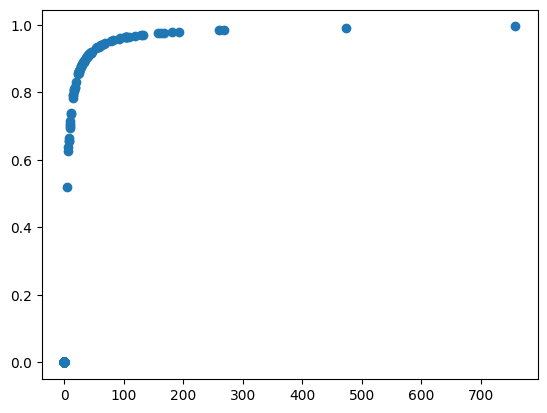

0.0


In [18]:
def s(x):
    return x / (x+4)

#snr
snr_in = binned_data['snr'].values
snr_in[np.isnan(snr_in)] = 0
plt.plot(snr_in, s(snr_in), 'o')
plt.show()

print(s(min(snr_in)))